In [9]:
import geopandas as gpd
import pysal
import cartopy
#!pip3 install geoplot
import geoplot
#!pip3 install osmnx
#import osmnx -- not working
#!pip3 install folium
import folium
import dash
import rasterio
import contextily

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Shapely and geometric objects

## Spatial data model

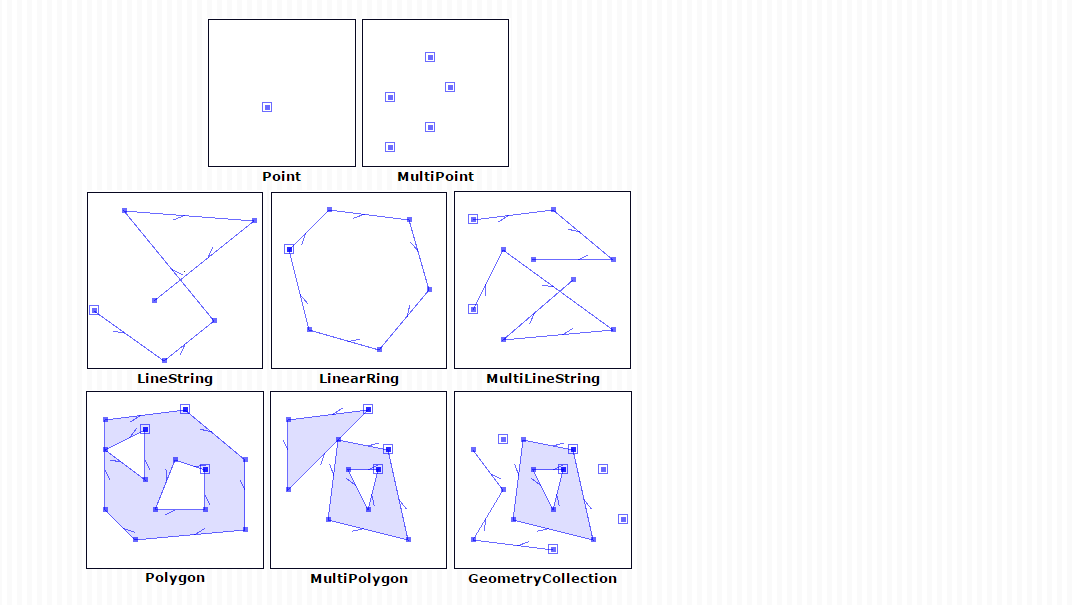

The most fundamental geometric objects are `Points`, `Lines` and `Polygons` which are the basic ingredients when working with spatial data in vector format. Python has a specific module called Shapely for doing various geometric operations. There are many useful functionalities that you can do with Shapely such as:
- Create a `Line` or `Polygon` from a `Collection` of `Point`-geometries
- Calculate areas/length/bounds etc. of input geometries
- Conduct geometric operations based on the input geometries such as `Union`, `Difference`, `Distance` etc.
- Conduct spatial queries between geometries such as `Intersects`, `Touches`, `Crosses`, `Within` etc.

Geometric Objects consist of coordinate tuples where:
- `Point` - object represents a single point in space. Points can be either two-dimensional (x, y) or three dimensional (x, y, z).
- `LineString` - object (i.e. a line) represents a sequence of points joined together to form a line. Hence, a line consist of a list of at least two coordinate tuples
- `Polygon` - object represents a filled area that consists of a list of at least three coordinate tuples that forms the outerior ring and a (possible) list of hole polygons.

It is also possible to have a collection of geometric objects (e.g. Polygons with multiple parts):
- `MultiPoint` - object represents a collection of points and consists of a list of coordinate-tuples
- `MultiLineString` - object represents a collection of lines and consists of a list of line-like sequences
- `MultiPolygon` - object represents a collection of polygons that consists of a list of polygon-like sequences that construct from exterior ring and (possible) hole list tuples

Tuples belong to sequence data types in Python. Other sequence data types are lists and ranges. Tuples have many similarities with lists and ranges, but they are often used for different purposes. The main difference between tuples and lists is that tuples are immutable, which means that the contents of a tuple cannot be altered (while lists are mutable; you can, for example, add and remove values from lists).

## Point
Creating points are easy, simply by passing x- and y-coordinates into `Point()`-object (also possible z-coordinates):

In [10]:
from shapely.geometry import Point, LineString, Polygon

# Create Point geometric object(s) with coordinates
point1 = Point(2.2, 4.2)
point2 = Point(7.2, -25.1)
point3 = Point(9.26, -2.456)
point3D = Point(9.26, -2.456, 0.57)

Let's see what the variables look like:

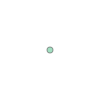

In [11]:
point1

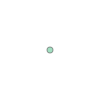

In [12]:
point2

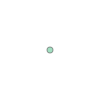

In [13]:
point3D

We can also print out the points to see the actual definition:

In [14]:
print(point1)
print(point3D)

POINT (2.2 4.2)
POINT Z (9.26 -2.456 0.57)


In [15]:
type(point1)

shapely.geometry.point.Point

## Point Attributes and functions

Points and other shapely objects have useful built-in attributes and methods. One of the most useful ones are the ability to extract the coordinates of a Point and calculate the Euclidian distance between points.

Extracting the coordinates of a Point can be done in a couple of different ways:

In [16]:
# Get the coordinates
point_coords = point1.coords
point_coords

In [17]:
type(point_coords)

shapely.coords.CoordinateSequence

As we can see, the data type of our `point_coords` variable is a Shapely CoordinateSequence.

Let’s see how we can get out the actual coordinates from this object:

In [18]:
# Get x and y coordinates
xy = point_coords.xy

x = point1.x
y = point1.y

print('xy: ', xy)
print('x: ', x)
print('y: ', y)

xy:  (array('d', [2.2]), array('d', [4.2]))
x:  2.2
y:  4.2


As we can see from above the `xy`-variable contains a tuple where x and y coordinates are stored inside numpy arrays. Using the attributes `point1.x` and `point1.y` it is possible to get the coordinates directly as plain decimal numbers.

It is also possible to calculate the distance between two objects using shapely. The returned distance is based on the projection of the points (e.g. degrees in WGS84, meters in UTM).

Let’s calculate the distance between `point1` and `point2`:

In [19]:
# Calculate the distance between point1 and point2
point_dist = point1.distance(point2)
print("Distance between the points is {0:.2f} decimal degrees.".format(point_dist))

Distance between the points is 29.72 decimal degrees.


## LineString

Creating LineString -objects is fairly similar to creating Shapely Points.

Now instead using a single coordinate-tuple we can construct the line using either a list of shapely Point -objects or pass the points as coordinate-tuples:

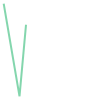

In [20]:
# Create a LineString from our point objects
line = LineString([point1, point2, point3])

# also possible to produce the same outcome using coordinate tuples
line2 = LineString([(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)])

line

In [21]:
print("line: \n", line, "\n")
print("line2: \n", line2, "\n")

line: 
 LINESTRING (2.2 4.2, 7.2 -25.1, 9.26 -2.456) 

line2: 
 LINESTRING (2.2 4.2, 7.2 -25.1, 9.26 -2.456) 



In [22]:
print("Object data type:", type(line))
print("Geometry type as text:", line.geom_type)

Object data type: <class 'shapely.geometry.linestring.LineString'>
Geometry type as text: LineString


## LineString attributes and functions

`LineString`-object has many useful built-in attributes and functionalities. It is for instance possible to extract the coordinates or the length of a LineString (line), calculate the centroid of the line, create points along the line at specific distance, calculate the closest distance from a line to specified Point and simplify the geometry. See full list of functionalities from Shapely documentation. Here, we go through a few of them.

We can extract the coordinates of a LineString similarly as with `Point`.

In [23]:
# Get x and y coordinates of the line
lxy = line.xy
lxy

(array('d', [2.2, 7.2, 9.26]), array('d', [4.2, -25.1, -2.456]))

As we can see, the coordinates are again stored as a numpy arrays where first array includes all x-coordinates and the second one all the y-coordinates respectively.

We can extract only x or y coordinates by referring to those arrays using indices (same way you would access values in a list):

In [24]:
# Extract x coordinates
line_xcoords = lxy[0]

# Extract y coordinates straight from the LineObject by referring to an array at index 1
line_ycoords = line.xy[1]

print('line x:\n', line_xcoords, '\n')
print('line y:\n', line_ycoords)

line x:
 array('d', [2.2, 7.2, 9.26]) 

line y:
 array('d', [4.2, -25.1, -2.456])


It is possible to retrieve specific attributes such as lenght of the line and center of the line (centroid) straight from the LineString object itself:

In [25]:
# Get the length of the line
l_length = line.length

# Get the centroid of the line
l_centroid = line.centroid

print("Length of our line: {0:.2f}".format(l_length))
print("Centroid of our line: ", l_centroid)
print("Type of the centroid:", type(l_centroid))

Length of our line: 52.46
Centroid of our line:  POINT (6.229961354035622 -11.89241115757239)
Type of the centroid: <class 'shapely.geometry.point.Point'>


## Polygon

Creating a `Polygon`-object continues the same logic of how `Point` and `LineString` were created but Polygon object only accepts a sequence of coordinates as input.

Polygon needs **at least three coordinate-tuples** (that basically forms a triangle):

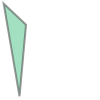

In [26]:
# Creatae a Polygon from the coordinates
poly = Polygon([(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)])

# Also possible to produce the same outcome using a list of lists which contain the point coordinates
poly2 = Polygon([p.x, p.y] for p in [point1, point2, point3])

poly

In [27]:
print('poly:', poly)
print('poly2:', poly2)

poly: POLYGON ((2.2 4.2, 7.2 -25.1, 9.26 -2.456, 2.2 4.2))
poly2: POLYGON ((2.2 4.2, 7.2 -25.1, 9.26 -2.456, 2.2 4.2))


Notice that Polygon representation has double parentheses around the coordinates (i.e. `POLYGON ((<values in here>))` ). This is because Polygon can also have holes inside of it.

Check also the data type:

In [28]:
print("Object data type:", type(poly))
print("Geometry type as text:", poly.geom_type)

# Check the help for Polygon objects:
#help(Polygon)

Object data type: <class 'shapely.geometry.polygon.Polygon'>
Geometry type as text: Polygon


Let’s see how we can create a `Polygon` with a hole inside; lLet’s create a bounding box of the world and make a whole in it:

In [29]:
# Define the exterior
world_exterior = [(-180, 90), (-180, -90), (180, -90), (180, 90)]

# Let's create a single big hole where we leave ten decimal degrees at the boundaries of the world
hole = [[(-170, 80), (-170, -80), (170, -80), (170, 80)]]
# Notice that there could be multiple holes, thus we need to provide a list of holes if ever

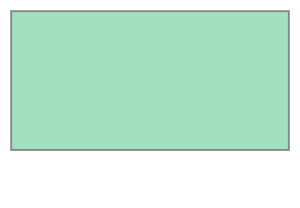

In [30]:
# World without a hole
world = Polygon(shell = world_exterior)
world

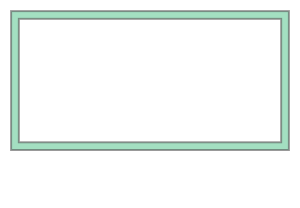

In [31]:
# World with the hole inside
world_has_a_hole = Polygon(shell = world_exterior, holes = hole)
world_has_a_hole

In [32]:
print('world:', world)
print('world_has_a_hole:', world_has_a_hole)
print('type:', type(world_has_a_hole))

world: POLYGON ((-180 90, -180 -90, 180 -90, 180 90, -180 90))
world_has_a_hole: POLYGON ((-180 90, -180 -90, 180 -90, 180 90, -180 90), (-170 80, -170 -80, 170 -80, 170 80, -170 80))
type: <class 'shapely.geometry.polygon.Polygon'>


As we can see the `Polygon` has now two different tuples of coordinates. The first one represents the exterior and the second one represents the hole inside of the Polygon.

## Polygon attributes and functions

We can again access different attributes directly from the `Polygon` object itself that can be really useful for many analyses, such as `area`, `centroid`, `bounding box`, `exterior`, and `exterior-length`. See a full list of methods in the Shapely User Manual.

Here, we can see a few of the available attributes and how to access them:

In [33]:
# Get centroid of the Polygon
world_centroid = world.centroid

# Get the area of the Polygon
world_area = world.area

# Get the bounds of the Polygon (i.e. bounding box)
world_bbox = world.bounds

# Get the exterior of the Polygon
world_ext = world.exterior

# Get the length of the exterior
world_ext_length = world_ext.length

# Print the outputs
print("Poly centroid: ", world_centroid)
print("Poly Area: ", world_area)
print("Poly Bounding Box: ", world_bbox)
print("Poly Exterior: ", world_ext)
print("Poly Exterior Length: ", world_ext_length)

Poly centroid:  POINT (-0 -0)
Poly Area:  64800.0
Poly Bounding Box:  (-180.0, -90.0, 180.0, 90.0)
Poly Exterior:  LINEARRING (-180 90, -180 -90, 180 -90, 180 90, -180 90)
Poly Exterior Length:  1080.0


As we can see above, it is again fairly straightforward to access different attributes from the `Polygon`-object. Notice, that the extrerior length is given here with decimal degrees because we passed latitude and longitude coordinates into our Polygon.

## Geometry collections

In some occassions it is useful to store e.g. multiple lines or polygons under a single feature (i.e. a single row in a Shapefile represents more than one line or polygon object). Collections of points are implemented by using a `MultiPoint`-object, collections of curves by using a `MultiLineString`-object, and collections of surfaces by a `MultiPolygon`-object. These collections are not computationally significant, but are useful for modeling certain kinds of features. A Y-shaped line feature (such as road), or multiple polygons (e.g. islands on a like), can be presented nicely as a whole by a using `MultiLineString` or `MultiPolygon` accordingly. Creating and visualizing a minimum bounding box e.g. around your data points is a really useful function for many purposes (e.g. trying to understand the extent of your data), here we demonstrate how to create one using Shapely.

Geometry collections can be constructed in a following manner:

In [34]:
from shapely.geometry import MultiPoint, MultiLineString, MultiPolygon, box

# Create a MultiPlot object of our points 1, 2, and 3
multi_point = MultiPoint([point1, point2, point3])

# Also possible to pass coordinate tuples inside
multi_point2 = MultiPoint([(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)])

# We can also create a MultiLineString with two lines
line1 = LineString([point1, point2])
line2 = LineString([point2, point3])
multi_line = MultiLineString([line1, line2])

`MultiPolygon` can be done in a similar manner. Let's divide our world into western and eastern hemispheres with a hole on the western hemisphere.

In [35]:
# Let's create the exterior of the western part of the world
west_exterior = [(-180, 90), (-180, -90), (0, -90), (0, 90)]

# Let's create a hole
west_hole = [[(-170, 80), (-170, -80), (-10, -80), (-10, 80)]]

# Create the Polygon
west_poly = Polygon(shell = west_exterior, holes = west_hole)

# For bounding box, we need to specify the lower-left corner coordinates and upper-right coordinatesd
min_x, min_y = 0, -90
max_x, max_y = 180, 90

# Create the polygon using box() function
east_poly_box = box(minx = min_x, miny = min_y, maxx = max_x, maxy = max_y)

# Let's create our MultiPolygon; we can pass multiple Polygon-objects into our MultiPolygon as a list
multi_poly = MultiPolygon([west_poly, east_poly_box])

# Print outputs
print("MultiPoint:", multi_point)
print("MultiLine: ", multi_line)
print("Bounding box: ", east_poly_box)
print("MultiPoly: ", multi_poly)

MultiPoint: MULTIPOINT (2.2 4.2, 7.2 -25.1, 9.26 -2.456)
MultiLine:  MULTILINESTRING ((2.2 4.2, 7.2 -25.1), (7.2 -25.1, 9.26 -2.456))
Bounding box:  POLYGON ((180 -90, 180 90, 0 90, 0 -90, 180 -90))
MultiPoly:  MULTIPOLYGON (((-180 90, -180 -90, 0 -90, 0 90, -180 90), (-170 80, -170 -80, -10 -80, -10 80, -170 80)), ((180 -90, 180 90, 0 90, 0 -90, 180 -90)))


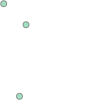

In [36]:
multi_point

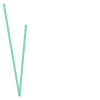

In [37]:
multi_line

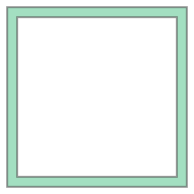

In [38]:
west_poly

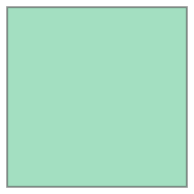

In [39]:
east_poly_box

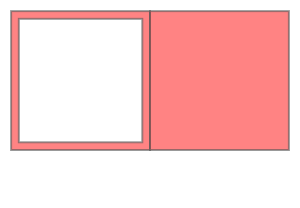

In [40]:
multi_poly

We can see that the outputs are similar to the basic geometric objects that we created previously but now these objects contain multiple features of those points, lines or polygons.

## Geometry collection-objects' attributes and functions

Convex hull of the points:  POLYGON ((7.2 -25.1, 2.2 4.2, 9.26 -2.456, 7.2 -25.1))


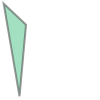

In [41]:
# Convex Hull of our MultiPoint --> https://en.wikipedia.org/wiki/Convex_hull
convex = multi_point.convex_hull

print('Convex hull of the points: ', convex)
convex

Other useful attributes of geometry collections:

In [42]:
# How many lines do we have inside our MultiLineString?
lines_count = len(multi_line)

print("Number of lines in MultiLineString:", lines_count)

Number of lines in MultiLineString: 2


In [43]:
# Let's calculate the area of our MultiPolygon
multi_poly_area = multi_poly.area
multi_poly_area

39200.0

We can also access different items inside our geometry collections. We can e.g. access a single polygon from our `MultiPolygon`-object by referring to the index:

In [44]:
# Let's calculate the area of our Western hemisphere (with a hole), which is at index 0
west_area = multi_poly[0].area

# Print outputs:
print("Area of our MultiPolygon:", multi_poly_area)
print("Area of our Western Hemisphere polygon:", west_area)

Area of our MultiPolygon: 39200.0
Area of our Western Hemisphere polygon: 6800.0


From the above we can see that MultiPolygons have exactly the same attributes available as single geometric objects but now the information such as area calculates the area of ALL of the individual -objects combined.

We can also check if we have a “valid” MultiPolygon. MultiPolygon is thought as valid if **the individual polygons do not intersect with each other.** Here, because the polygons have a common 0-meridian, we should NOT have a valid polygon. We can check the validity of an object from the is_valid -attribute that tells if the polygons or lines intersect with each other. This can be really useful information when trying to find topological errors from your data:

In [45]:
valid = multi_poly.is_valid
print("Is polygon valid?: ", valid)

Is polygon valid?:  False


# Exercises

## Creating basic geometries

Create a function called `create_point_geom()` that has two parameters (x_coord, y_coord). Function should create a shapely `Point` geometry object and return that.

In [80]:
def create_point_geom(x_coord, y_coord):
    """
    The function should create a shapely Point geometry object and return that.
    """
    point = Point(x_coord, y_coord)
    return point

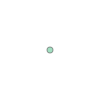

In [47]:
point1 = create_point_geom(0.0, 1.1)
point1

In [48]:
point1.geom_type

'Point'

Create a function called `create_line_geom()` that takes a list of Shapely Point objects as parameter called `points` and returns a LineString object of those input points. In addition, you should take care that the function is used as it should:
- Inside the function, you should first check with `assert`-functionality that the input is a list (see lesson 6 from the Geo-Python course and hints for this exercise). If something else than a list is passed for the function, you should return an Error message:` "Input should be a list!"`
- You should also check with `assert` that the input list contains at least two values. If not, return an Error message: `"LineString object requires at least two Points!"`
- Optional: Finally, you should check with `assert` that all values in the input list are truly Shapely Points. If not, return an Error message: `"All list values should be Shapely Point objects!"`

In [79]:
import shapely
def create_line_geom(points):
    """
    The function should take a list of Shapely Point objects as parameter called `points` and return
    a LineString object of those input points.
    """
    assert type(points) is list, 'Input should be a list!'
    assert len(points) >= 2, 'LineString object requires at least two Points!'
    for point in points:
        assert isinstance(point, shapely.geometry.point.Point), 'All list values should be Shapely Point objects!'
    line = LineString(points)
    return line

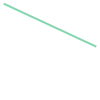

In [50]:
line1 = LineString([Point(45.2, 22.34), Point(100.22, -3.2)]) # change this for testing
line1

In [51]:
line1.geom_type

'LineString'

In [52]:
try:
    # Pass something else than a list
    create_line_geom("Give me a line!")
except AssertionError:
    print("List check works")
except Exception as e:
    raise e

List check works


Create a function called `create_poly_geom()` that has one parameter called `coords`. The `coords` parameter should contain a list of coordinate tuples. The function should create and return a Polygon object based on these coordinates.
- Inside the function, you should first check with `assert`-functionality that the input is a list (see lesson 6 and hints). If something else than a list is passed for the function, you should return an Error message: `"Input should be a list!"`
- You should also check with `assert` that the input list contains at least three values. If not, return an Error message: `"Polygon object requires at least three Points!"`
- Check the data type of the objects in the input list. All values in the input list should be tuples. If not, return an error message:` "All list values should be coordinate tuples!"` using `assert`.
- Optional: Allow also an input containing a list of Shapely Point objects. If `coords` contans a list of Shapely Point objects, return a polygon based on these points. If the input is neither a list of tuples, nor a list of Points, return an appropriate error message using `assert`.

In [78]:
def create_poly_geom(coords):
    """
    The function should create and return a Polygon object based on the coordinates in parameter `coords`.
    """
    assert type(coords) is list, 'Input should be a list!'
    assert len(coords) >= 3, 'LineString object requires at least three Points!'
    for coord in coords:
        if isinstance(coord, shapely.geometry.point.Point):
            continue
        else:
            assert isinstance(coord, tuple), 'All list values should be coordinate tuples!'
    poly = Polygon(coords)    
    # poly = Polygon([p.x, p.y] for p in coords)
    return poly

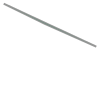

In [54]:
hello = [(45.2, 22.34), (100.22, -3.20), (70.0, 10.20)]
poly1 = create_poly_geom(hello)
poly1

In [55]:
poly1.geom_type

'Polygon'

In [56]:
try:
    # Pass something else than a list
    create_poly_geom("Give me a polygon")
except AssertionError:
    print("List check works")
except Exception as e:
    raise e

List check works


In [57]:
point1.geom_type

'Point'

## Attributes of geometries

Create a function called `get_centroid()` that has one parameter called `geom`. The function should take any kind of Shapely's geometric -object as an input, and return a centroid of that geometry. In addition, you should take care that the function is used as it should:

Inside the function, you should first check with `assert`-functionality that the input is a Shapely Point, LineString or Polygon geometry (see lesson 6 and hints). If something else than a list is passed for the function, you should return an Error message: `"Input should be a Shapely geometry!"`

In [77]:
def get_centroid(geom):
    """
    The function should take any kind of Shapely's geometric -object as an input, and return a centroid of that geometry.
    """
    assert type(geom) in [shapely.geometry.point.Point,
                          shapely.geometry.linestring.LineString,
                          shapely.geometry.polygon.Polygon], 'Input should be a Shapely geometry'
    centroid = geom.centroid
    return centroid

In [59]:
type(line1)

shapely.geometry.linestring.LineString

In [60]:
centroid = get_centroid(poly1)
print(centroid)

POINT (71.80666666666667 9.780000000000001)


In [61]:
try:
    # Pass something else than a Shapely geometry
    get_centroid("Give me a centroid!")
except AssertionError:
    print("Geometry -check works")
except Exception as e:
    raise e

Geometry -check works


Create a function called `get_area()` with one parameter called `polygon`. Function should take a Shapely's Polygon -object as input and returns the area of that geometry.

Inside the function, you should first check with `assert`-functionality that the input is a Shapely Polygon geometry (see lesson 6 and hints). If something else than a list is passed for the function, you should return an Error message: `"Input should be a Shapely Polygon -object!"`

In [75]:
def get_area(polygon):
    """
    The function should take a Shapely's Polygon -object as input and returns the area of that geometry.
    """
    assert type(polygon) is shapely.geometry.polygon.Polygon, 'Input should be a Shapely Polygon-object!'
    area = polygon.area
    return area

In [63]:
area = get_area(poly1)
print(area)

17.275400000000047


Create a function called `get_length()` with parameter called `geom`. The function should accept either a Shapely LineString or Polygon -object as input. Function should check the type of the input and returns the length of the line if input is LineString and length of the exterior ring if input is Polygon. If something else is passed to the function, you should return an `Error "'geom' should be either LineString or Polygon!"`. (Use assert functionality).

In [73]:
def get_length(geom):
    """
    The function should accept either a Shapely LineString or Polygon -object as input.
    It should check the type of the input and returns the length of the line if input is a
    LineString and length of the exterior ring if input is Polygon.
    """
    assert type(geom) in [shapely.geometry.linestring.LineString,
                         shapely.geometry.polygon.Polygon], "'geom' should be either LineString or Polygon!"
    if type(geom) is shapely.geometry.linestring.LineString:
        length = geom.length
    else:
        world_ext = geom.exterior
        length = world_ext.length
    return length

In [65]:
line_length = get_length(line1)
print("Line length:", round(line_length,2))

Line length: 60.66


In [66]:
poly_exterior_length = get_length(poly1)
print("Polygon exterior length:", round(poly_exterior_length,2))

Polygon exterior length: 121.33


In [68]:
try:
    # Pass something else than a Shapely LineString or Polygon
    get_length(Point(1, 2))
except AssertionError:
    print("Geometry -check works")
except Exception as e:
    raise e

Geometry -check works


In [69]:
get_length(Point(3, 4))

AssertionError: 'geom' should be either LineString or Polygon!

In [81]:
functions = [create_point_geom, create_line_geom, create_poly_geom, get_centroid,
            get_area, get_length]

print("I created functions for doing these tasks:\n")

for function in functions:
    #Print function name and docstring:
    print("-", function.__name__ +":", function.__doc__)

I created functions for doing these tasks:

- create_point_geom: 
    The function should create a shapely Point geometry object and return that.
    
- create_line_geom: 
    The function should take a list of Shapely Point objects as parameter called `points` and return
    a LineString object of those input points.
    
- create_poly_geom: 
    The function should create and return a Polygon object based on the coordinates in parameter `coords`.
    
- get_centroid: 
    The function should take any kind of Shapely's geometric -object as an input, and return a centroid of that geometry.
    
- get_area: 
    The function should take a Shapely's Polygon -object as input and returns the area of that geometry.
    
- get_length: 
    The function should accept either a Shapely LineString or Polygon -object as input.
    It should check the type of the input and returns the length of the line if input is a
    LineString and length of the exterior ring if input is Polygon.
    


## Reading coordinates from a file and creating geometries

One of the most typical problems in GIS is the situation where you have a set of coordinates in some file, and you need to map those. Python is a really handy tool for these kind of situations, as it is possible to read data from (basically) any kind of input datafile (such as csv-, txt-, excel-, gpx-files (gps data), databases etc.).

Thus, let's see how we can read data from a file and create Point -objects from them that can be saved e.g. as a new Shapefile (we will learn this next week). Our dataset travelTimes_2015_Helsinki.txt consist of travel times between specific locations in Helsinki Region. The first four rows of our data looks like this:

   `from_id;to_id;fromid_toid;route_number;at;from_x;from_y;to_x;to_y;total_route_time;route_time;route_distance
   5861326;5785640;5861326_5785640;1;08:10;24.9704379;60.3119173;24.8560344;60.399940599999994;125.0;99.0;22917.6
   5861326;5785641;5861326_5785641;1;08:10;24.9704379;60.3119173;24.8605682;60.4000135;123.0;102.0;23123.5
   5861326;5785642;5861326_5785642;1;08:10;24.9704379;60.3119173;24.865102;60.4000863;125.0;103.0;23241.3`

As we can see, there exists many columns in the data, but the few important ones needed here are:

| **column** | **Description** |
| --- | --- |
| from_x | x-coordinate of the **origin** location (longitude) |
| from_y | y-coordinate of the **origin** location (latitude) |
| to_x | x-coordinate of the **destination** location (longitude) |
| to_y | y-coordinate of the **destination** location (latitude) |
| total_route_time | travel time with public transportation at the route |

In [82]:
data = pd.read_csv('data/travelTimes_2015_Helsinki.txt', sep = ';')
data.head()

,from_id,to_id,fromid_toid,route_number,at,from_x,from_y,to_x,to_y,total_route_time,route_time,route_distance,route_total_lines
0,5861326,5785640,5861326_5785640,1,08:10,24.970438,60.311917,24.856034,60.399941,125.0,99.0,22917.6,2.0
1,5861326,5785641,5861326_5785641,1,08:10,24.970438,60.311917,24.860568,60.400014,123.0,102.0,23123.5,2.0
2,5861326,5785642,5861326_5785642,1,08:10,24.970438,60.311917,24.865102,60.400086,125.0,103.0,23241.3,2.0
3,5861326,5785643,5861326_5785643,1,08:10,24.970438,60.311917,24.869636,60.400159,129.0,107.0,23534.2,2.0
4,5861326,5787544,5861326_5787544,1,08:10,24.970438,60.311917,24.842582,60.397478,118.0,92.0,22428.2,2.0


In [83]:
data.shape

(14643, 13)

In [84]:
# Select only from- and to- columns

In [85]:
data = data[['from_x', 'from_y', 'to_x', 'to_y']]
data.head()

,from_x,from_y,to_x,to_y
0,24.970438,60.311917,24.856034,60.399941
1,24.970438,60.311917,24.860568,60.400014
2,24.970438,60.311917,24.865102,60.400086
3,24.970438,60.311917,24.869636,60.400159
4,24.970438,60.311917,24.842582,60.397478


In [86]:
list(data.columns)

['from_x', 'from_y', 'to_x', 'to_y']

In [96]:
# Create two empty lists for origin and destination points
orig_points = []
dest_points = []

print('orig_points length:', len(orig_points))
print('dest_points length:', len(dest_points))

orig_points length: 0
dest_points length: 0


Create shapely points for each origin and destination and add origin points to `orig_points` list and destination points to `dest_points` list.

In [97]:
for idx, row in data.iterrows():
    orig_point = Point(row['from_x'], row['from_y'])
    dest_point = Point(row['to_x'], row['to_y'])
    
    orig_points.append(orig_point)
    dest_points.append(dest_point)

print("ORIGIN X Y:", orig_points[0].x, orig_points[0].y)
print("DESTINATION X Y:", dest_points[0].x, dest_points[0].y)

#Check that you created a correct amount of points:
assert len(orig_points) == len(data), "Number of origin points must be the same as number of rows in the original file"
assert len(dest_points) == len(data), "Number of destination points must be the same as number of rows in the original file"

ORIGIN X Y: 24.9704379 60.3119173
DESTINATION X Y: 24.8560344 60.3999406


## Creating LineStrings that represent the movements

Creata a list called `lines`. Iterate over the origin and destination lists and create a Shapely LineString -object between the origin and destination point.
- Hint - Alternative 1: You can take advantage of `range()` function here that can help accessing the values from two lists at the same time.
- Hint - Alternative 2: You can use `zip()` function to iterate over many lists at the same time.

Add the LineString into the `lines`-list.

In [100]:
lines = []

for origin, dest in zip(orig_points, dest_points):
    line = LineString([origin, dest])
    lines.append(line)

assert len(lines) == len(data), "There should be as many lines as there are rows in the original data"

Create a variable called `total_length`, and store the total (Euclidian) distance of all the origin-destination LineStrings that we just created into that variable.

In [101]:
total_length = 0

for line in lines:
    total_length += line.length

print("Total length of all lines is", round(total_length, 2))

Total length of all lines is 3148.57


Write the previous parts, i.e. the creation of the LineString and calculating the total distance, into dedicated functions:
- `create_od_lines()`: Takes two lists of Shapely Point -objects as input and returns a list of LineStrings
- `calculate_total_distance()`: Takes a list of LineString geometries as input and returs their total length

In [102]:
def create_od_lines(orig_points, dest_points):
    """
    Takes two lists of Shapely Point -objects as input and returns a list of LineStrings.
    """
    
    lines = []
    
    for origin, dest in zip(orig_points, dest_points):
        line = LineString([origin, dest])
        lines.append(line)
    return lines

def calculate_total_distance(lines):
    """
    Takes a list of LineString geometries as input and returs their total length.
    """
    total_length = 0

    for line in lines:
        total_length += line.length
    return total_length

In [103]:
od_lines = create_od_lines(orig_points, dest_points)

# Calculate the total distance
tot_dist = calculate_total_distance(od_lines)

print("Total distance", round(tot_dist, 2))

Total distance 3148.57
